Task 2 - User Engagement Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.cluster import KMeans
import scipy.spatial.distance as dist
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df1 = pd.read_csv('C:\\Users\\Dell\\Desktop\\Next Hikes Project_5\\finel_data.csv')

In [3]:
df1

,Unnamed: 0,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,email,google,youtube,netflix,gaming,other,total_tp,total_rtt,total_tcp,Decile_rank
0,0,770.0000,662.00000,1.823652e+06,2.082014e+14,3.366496e+10,3.552121e+13,42.000000,5.000000,23.000000,...,3.701304e+06,2.905912e+06,1.835594e+07,1.785519e+07,2.924265e+08,1.805588e+08,67.000000,47.000000,2.156957e+07,4
1,1,235.0000,606.00000,1.365104e+06,2.082019e+14,3.368185e+10,3.579401e+13,65.000000,5.000000,16.000000,...,9.373850e+05,4.414096e+06,3.935912e+07,3.556554e+07,6.099208e+08,5.419594e+08,42.000000,70.000000,2.156957e+07,4
2,2,1.0000,652.00000,1.361762e+06,2.082003e+14,3.376063e+10,3.528151e+13,109.795706,17.662883,6.000000,...,3.363124e+06,1.022912e+07,3.442524e+07,2.375120e+07,2.299803e+08,4.149084e+08,15.000000,127.458589,2.156957e+07,4
3,3,486.0000,171.00000,1.321509e+06,2.082014e+14,3.375034e+10,3.535661e+13,109.795706,17.662883,44.000000,...,2.070983e+06,1.181176e+07,3.653476e+07,1.509259e+07,8.103879e+08,7.618372e+08,88.000000,127.458589,2.156957e+07,4
4,4,565.0000,954.00000,1.089009e+06,2.082014e+14,3.369980e+10,3.540701e+13,109.795706,17.662883,6.000000,...,2.110349e+06,7.748843e+06,3.422225e+07,1.753980e+07,5.312370e+08,5.646198e+08,15.000000,127.458589,2.156957e+07,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,149996,451.0000,214.00000,8.123000e+04,2.082022e+14,3.365069e+10,3.548311e+13,32.000000,0.000000,52.000000,...,6.908760e+05,1.278491e+07,2.795510e+07,3.756186e+07,5.358069e+08,1.675193e+07,117.000000,32.000000,2.156957e+07,1
149997,149997,483.0000,187.00000,9.797000e+04,2.082019e+14,3.366345e+10,3.566051e+13,27.000000,2.000000,23.000000,...,2.121718e+06,4.415361e+06,2.216552e+07,4.064329e+07,6.316281e+08,7.146381e+08,77.000000,29.000000,2.156957e+07,3
149998,149998,283.0000,810.00000,9.824900e+04,2.082017e+14,3.362189e+10,3.572121e+13,43.000000,6.000000,43.000000,...,2.058277e+06,6.585469e+06,2.451641e+07,1.502970e+07,5.669338e+08,1.324156e+08,90.000000,49.000000,2.156957e+07,3
149999,149999,696.0000,327.00000,9.791000e+04,2.082021e+14,3.361962e+10,8.618620e+13,37.000000,5.000000,34.000000,...,2.850914e+06,7.757267e+06,1.712251e+07,1.649484e+07,3.550664e+08,8.161200e+08,71.000000,42.000000,2.156957e+07,3


In [4]:
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df1.shape

(150001, 68)

2. User Engagement analysis

In the current dataset you’re expected to track the user’s engagement using the following engagement metrics:

* sessions frequency
* the duration of the session
* the sessions total traffic (download and upload (bytes))

## Sessions frequency, sessions duration, sessions total traffic. 

In [6]:
user_data = df1[['MSISDN/Number', 'total_bytes', 'Dur. (ms).1', 'Bearer Id']]

In [7]:
agg_user_data = user_data.groupby('MSISDN/Number').agg({'Bearer Id':'count', 'Dur. (ms).1':'sum',  'total_bytes': 'sum'})
agg_user_data.columns = ['sessions_freq', 'sessions_duration(ms)', 'sessions_traffic(bytes)']
agg_user_data.head()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes)
MSISDN/Number,,,
3.360100e+10,1,116720140.0,8.786906e+08
3.360100e+10,1,181230963.0,1.568596e+08
3.360100e+10,1,134969374.0,5.959665e+08
3.360101e+10,1,49878024.0,4.223207e+08
3.360101e+10,2,37104453.0,1.457411e+09


Top 10 users with high sessions frequency

Text(0.5, 1.0, 'a barplot indicating 10 users with highest number of sessions')

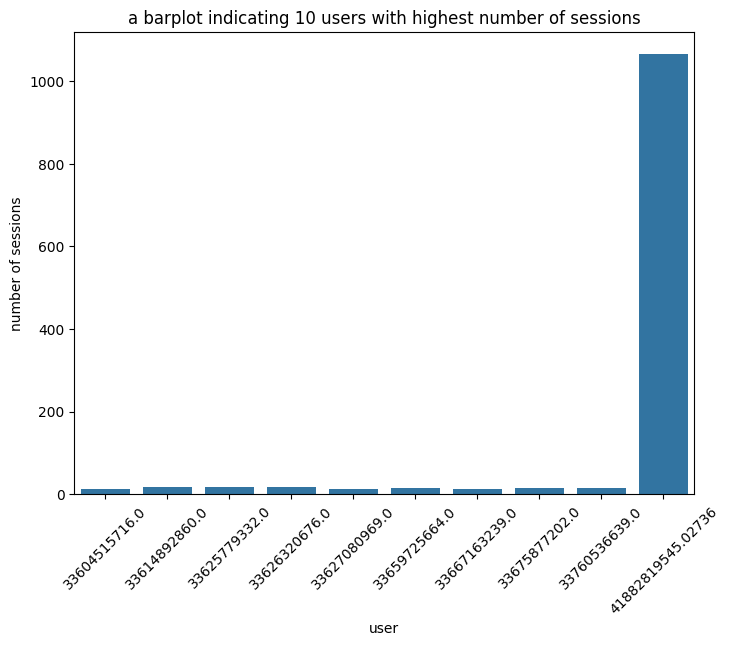

In [8]:
a = agg_user_data.sort_values(by = 'sessions_freq', ascending = False).head(10)
plt.figure(figsize = (8,6))
sns.barplot(x = a.index, y = a['sessions_freq'])
plt.ylabel('number of sessions')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest number of sessions')

Top 10 users with high sessions traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest sessions traffic')

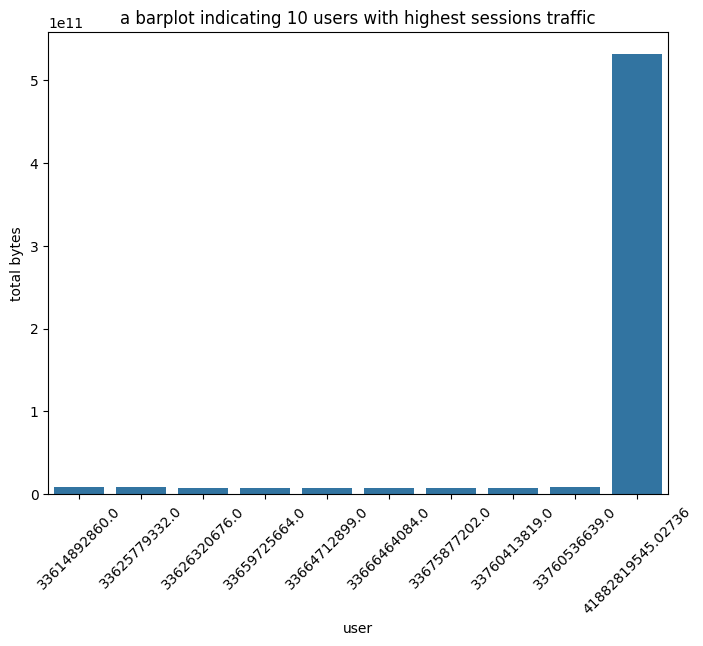

In [9]:
b = agg_user_data.sort_values(by = 'sessions_traffic(bytes)', ascending = False).head(10)
plt.figure(figsize = (8,6))
sns.barplot(x = b.index, y = b['sessions_traffic(bytes)'])
plt.ylabel('total bytes')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest sessions traffic')

Top 10 users with longest sessions duration

Text(0.5, 1.0, 'a barplot indicating 10 users with longest sessions duration')

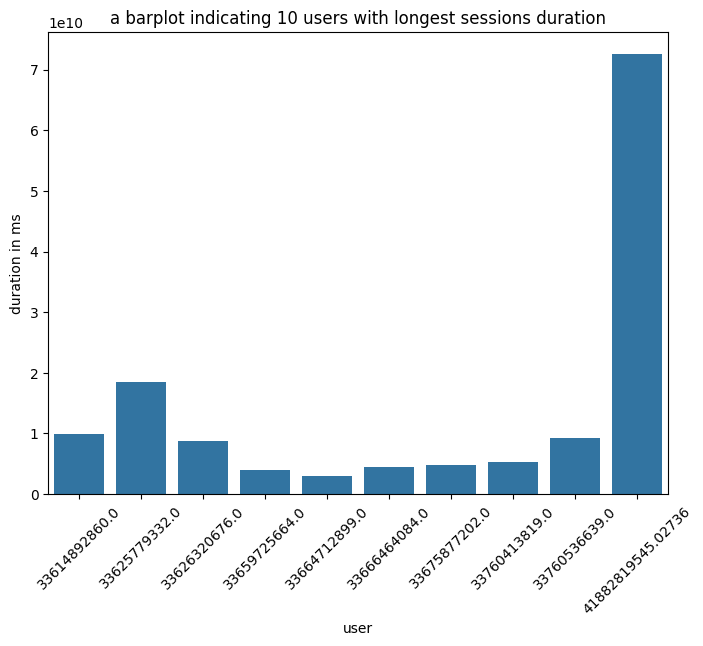

In [10]:
c = agg_user_data.sort_values(by = 'sessions_duration(ms)', ascending = False).head(10)
plt.figure(figsize = (8,6))
sns.barplot(x = b.index, y = b['sessions_duration(ms)'])
plt.ylabel('duration in ms')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with longest sessions duration')

In [11]:
# users in the 3 categories.
a = a.index.to_list()
b = b.index.to_list()
c = c.index.to_list()

def IntersecOfSets(arr1, arr2, arr3): 
    s1 = set(arr1) 
    s2 = set(arr2) 
    s3 = set(arr3) 

    set1 = s1.intersection(s2)
    result_set = set1.intersection(s3) 
      
    final_list = list(result_set) 
    print(final_list) 
  
IntersecOfSets(a, b, c) 

[33625779332.0, 33626320676.0, 41882819545.02736, 33614892860.0, 33760536639.0]


### Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement.

In [12]:
# Normalizing the aggregated dataset using log transformation
norm_agg_user_data = np.log1p(agg_user_data)
norm_agg_user_data.head()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes)
MSISDN/Number,,,
3.360100e+10,0.693147,18.575290,20.593943
3.360100e+10,0.693147,19.015283,18.870862
3.360100e+10,0.693147,18.720558,20.205695
3.360101e+10,0.693147,17.725091,19.861276
3.360101e+10,1.098612,17.429248,21.099927


In [13]:
norm_agg_user_data.shape

(106857, 3)

In [14]:
# kmeans on 3 clusters.
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
kmeans.fit(norm_agg_user_data)
kmeans_data = kmeans.predict(norm_agg_user_data)

In [15]:
kmeans_data

array([0, 0, 0, ..., 1, 1, 0])

In [16]:
# add the predicted clusters as a column in the df
norm_agg_user_data['clusters'] = pd.Series(kmeans_data, index=norm_agg_user_data.index)
norm_agg_user_data.head()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
MSISDN/Number,,,,
3.360100e+10,0.693147,18.575290,20.593943,0
3.360100e+10,0.693147,19.015283,18.870862,0
3.360100e+10,0.693147,18.720558,20.205695,0
3.360101e+10,0.693147,17.725091,19.861276,2
3.360101e+10,1.098612,17.429248,21.099927,2


In [17]:
norm_agg_user_data.to_csv('C:\\Users\\Dell\\Desktop\\Next Hikes Project_5\\norm_agg_user_data.csv')

<Axes: >

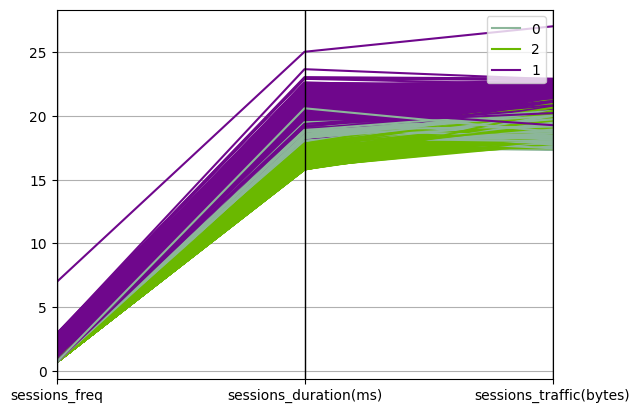

In [18]:
#plot the clusters(3D)
pd.plotting.parallel_coordinates(norm_agg_user_data, 'clusters')

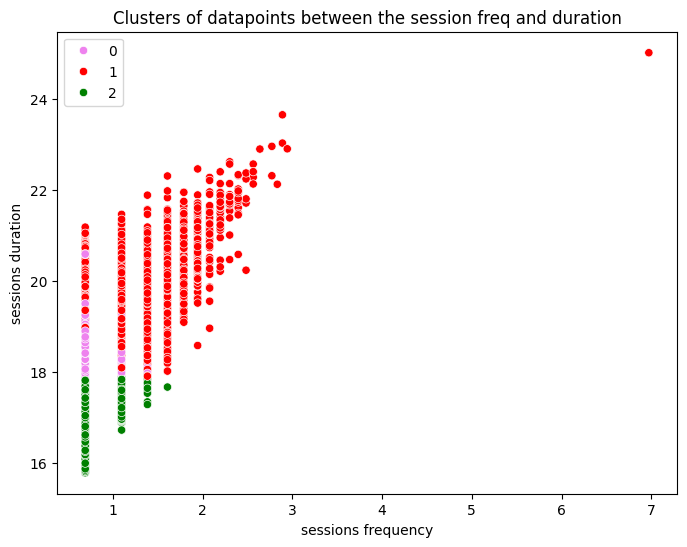

In [19]:
# comparing the clusters in variable pairs

# frequency and duration
x = norm_agg_user_data[['sessions_freq', 'sessions_duration(ms)', 'clusters']]
plt.figure(figsize = (8,6))
sns.scatterplot(x = norm_agg_user_data['sessions_freq'],  y = norm_agg_user_data['sessions_duration(ms)'], palette = ['violet', 'red', 'green'], hue = norm_agg_user_data['clusters'])
# sns.palplot(sns.color_palette(flatui))
plt.title('Clusters of datapoints between the session freq and duration')
plt.xlabel('sessions frequency')
plt.ylabel('sessions duration')
plt.legend()

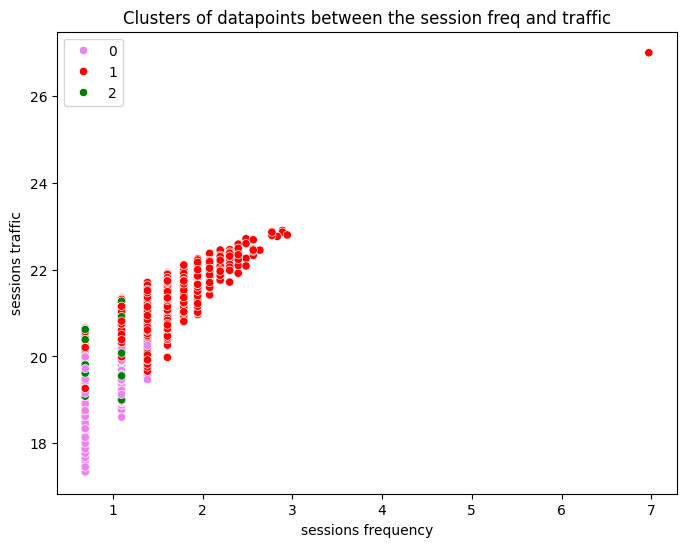

In [20]:
# comparing the clusters in variable pairs

# frequency and traffic
x = norm_agg_user_data[['sessions_freq', 'sessions_traffic(bytes)', 'clusters']]
plt.figure(figsize = (8,6))
sns.scatterplot(x = norm_agg_user_data['sessions_freq'],  y = norm_agg_user_data['sessions_traffic(bytes)'], palette = ['violet', 'red', 'green'], hue = norm_agg_user_data['clusters'])
# sns.palplot(sns.color_palette(flatui))
plt.title('Clusters of datapoints between the session freq and traffic')
plt.xlabel('sessions frequency')
plt.ylabel('sessions traffic')
plt.legend()

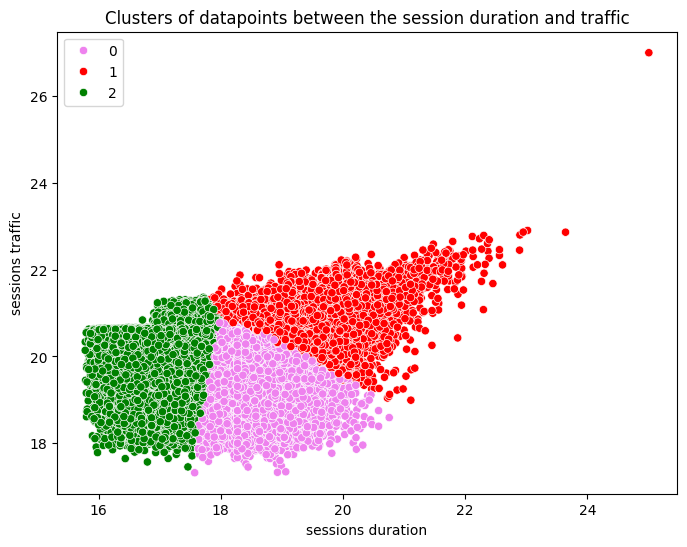

In [21]:
# comparing the clusters in variable pairs

# duration and traffic
x = norm_agg_user_data[['sessions_duration(ms)', 'sessions_traffic(bytes)', 'clusters']]
plt.figure(figsize = (8,6))
sns.scatterplot(x = norm_agg_user_data['sessions_duration(ms)'],  y = norm_agg_user_data['sessions_traffic(bytes)'], palette = ['violet', 'red', 'green'], hue = norm_agg_user_data['clusters'])
# sns.palplot(sns.color_palette(flatui))
plt.title('Clusters of datapoints between the session duration and traffic')
plt.xlabel('sessions duration')
plt.ylabel('sessions traffic')
plt.legend()

* Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text.

In [22]:
# add the clusters column to the non normalized data
agg_user_data['clusters'] = kmeans_data
agg_user_data.head()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
MSISDN/Number,,,,
3.360100e+10,1,116720140.0,8.786906e+08,0
3.360100e+10,1,181230963.0,1.568596e+08,0
3.360100e+10,1,134969374.0,5.959665e+08,0
3.360101e+10,1,49878024.0,4.223207e+08,2
3.360101e+10,2,37104453.0,1.457411e+09,2


In [23]:
agg_user_data.clusters.value_counts()

clusters
0    54810
1    29481
2    22566
Name: count, dtype: int64

In [24]:
# cluster 1 (cluster = 0)
cluster_1 = agg_user_data.loc[agg_user_data['clusters'] == 0]   #get observations under cluster 1
# cluster_1.loc['total_per_metric'] = cluster_1.sum()             #get the totals per metric
print(cluster_1.shape)
cluster_1.tail()

(54810, 4)


,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
MSISDN/Number,,,,
3.378996e+10,1,98826284.0,645777687.0,0
3.378996e+10,1,157069852.0,710287575.0,0
3.378997e+10,1,160461578.0,208123067.0,0
3.379000e+10,1,140988659.0,480307335.0,0
8.823971e+14,1,869844200.0,139153646.0,0


In [25]:
cluster_1.describe() # get the min, max and average per metric in cluster 2

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
count,54810.000000,5.481000e+04,5.481000e+04,54810.0
mean,1.065608,1.178942e+08,4.652787e+08,0.0
std,0.248922,5.131943e+07,2.357593e+08,0.0
min,1.000000,4.285693e+07,3.324901e+07,0.0
25%,1.000000,8.639992e+07,2.663626e+08,0.0
50%,1.000000,9.831699e+07,4.544889e+08,0.0
75%,1.000000,1.414464e+08,6.520239e+08,0.0
max,3.000000,1.035262e+09,1.214536e+09,0.0


In [26]:
# cluster 2 (cluster = 1)
cluster_2 = agg_user_data.loc[agg_user_data['clusters'] == 1]   #get observations under cluster 2
# cluster_2.loc['total_per_metric'] = cluster_2.sum()             #get the totals per metric
print(cluster_2.shape)
cluster_2.tail()

(29481, 4)


,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
MSISDN/Number,,,,
3.378995e+10,2,2.090513e+08,1.540055e+09,1
3.378998e+10,2,2.103901e+08,1.094693e+09,1
4.188282e+10,1066,7.255155e+10,5.317447e+11,1
3.197021e+12,1,8.773853e+08,2.321240e+08,1
3.370000e+14,1,2.530302e+08,5.962878e+08,1


In [27]:
cluster_2.describe() # get the min, max and average per metric in cluster 2

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
count,29481.000000,2.948100e+04,2.948100e+04,29481.0
mean,2.256606,2.888057e+08,1.223802e+09,1.0
std,6.293095,5.165473e+08,3.143173e+09,0.0
min,1.000000,5.447539e+07,1.770069e+08,1.0
25%,2.000000,1.727900e+08,8.215452e+08,1.0
50%,2.000000,2.257566e+08,1.059833e+09,1.0
75%,3.000000,3.316624e+08,1.444800e+09,1.0
max,1066.000000,7.255155e+10,5.317447e+11,1.0


In [28]:
# cluster 3 (cluster = 2)
cluster_3 = agg_user_data.loc[agg_user_data['clusters'] == 2]   #get observations under cluster 3
# cluster_3.loc['total_per_metric'] = cluster_3.sum()             #get the totals per metric
print(cluster_3.shape)
cluster_3.tail()

(22566, 4)


,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
MSISDN/Number,,,,
3.378988e+10,1,47989629.0,610571467.0,2
3.378991e+10,1,44199417.0,902088414.0,2
3.378992e+10,1,54339643.0,576824365.0,2
3.378994e+10,1,36812757.0,193917233.0,2
3.379000e+10,1,8810688.0,714641641.0,2


In [29]:
cluster_3.describe() # get the min, max and average per metric in cluster 3

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
count,22566.000000,2.256600e+04,2.256600e+04,22566.0
mean,1.110875,3.170306e+07,5.665322e+08,2.0
std,0.316234,1.340302e+07,2.960880e+08,0.0
min,1.000000,7.142988e+06,3.802236e+07,2.0
25%,1.000000,2.087679e+07,3.321138e+08,2.0
50%,1.000000,3.038938e+07,5.603923e+08,2.0
75%,1.000000,4.157774e+07,7.684501e+08,2.0
max,4.000000,6.478029e+07,1.895711e+09,2.0


* Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [49]:
apps_traffic = df1[['social_media', 'netflix', 'youtube', 'google', 'email', 'gaming', 'other', 'MSISDN/Number']]
apps_traffic.tail()

,social_media,netflix,youtube,google,email,gaming,other,MSISDN/Number
149996,3.517065e+06,3.756186e+07,2.795510e+07,1.278491e+07,6.908760e+05,5.358069e+08,1.675193e+07,3.365069e+10
149997,2.352181e+06,4.064329e+07,2.216552e+07,4.415361e+06,2.121718e+06,6.316281e+08,7.146381e+08,3.366345e+10
149998,1.260239e+06,1.502970e+07,2.451641e+07,6.585469e+06,2.058277e+06,5.669338e+08,1.324156e+08,3.362189e+10
149999,8.231090e+05,1.649484e+07,1.712251e+07,7.757267e+06,2.850914e+06,3.550664e+08,8.161200e+08,3.361962e+10
150000,1.828250e+06,2.262861e+07,2.264348e+07,7.807295e+06,2.259102e+06,4.303331e+08,4.293653e+08,4.188282e+10


In [30]:
agg_apps_traffic = df1.groupby('MSISDN/Number').agg({'social_media':'sum', 'netflix':'sum', 'youtube':'sum', 'gaming':'sum', 
                                                            'google':'sum', 'email':'sum', 'other':'sum'})
agg_apps_traffic.head()

,social_media,netflix,youtube,gaming,google,email,other
MSISDN/Number,,,,,,,
3.360100e+10,2232135.0,27180981.0,21624548.0,8.124587e+08,4389005.0,1331362.0,386570872.0
3.360100e+10,2660565.0,11221763.0,12432223.0,1.197501e+08,5334863.0,3307781.0,281710071.0
3.360100e+10,3195623.0,19353900.0,21333570.0,5.388277e+08,3443126.0,3205380.0,501693672.0
3.360101e+10,280294.0,1942092.0,6977321.0,3.911261e+08,9678493.0,2284670.0,35279702.0
3.360101e+10,2912542.0,49201724.0,41533002.0,1.314798e+09,18499616.0,3305469.0,804804484.0


10 users with highest social media traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest social_media traffic')

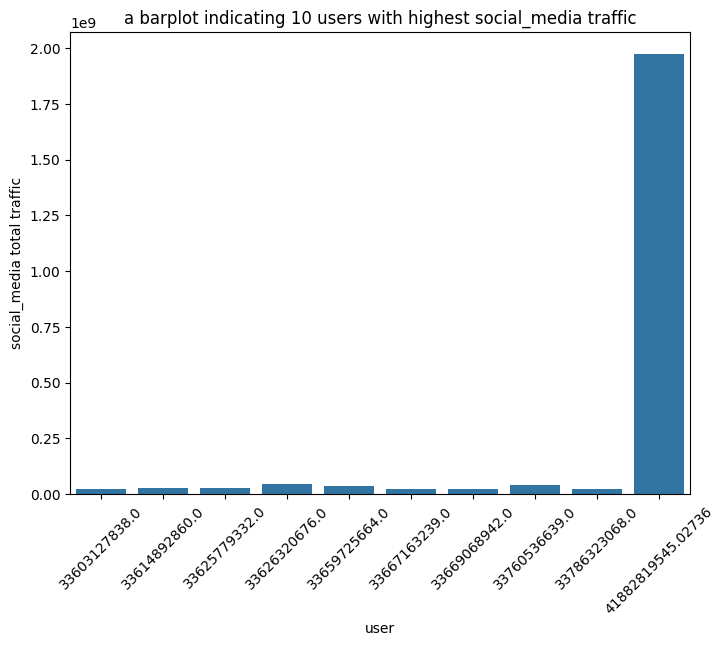

In [31]:
b = agg_apps_traffic.sort_values(by = 'social_media', ascending = False).head(10)
plt.figure(figsize = (8,6))
sns.barplot(x = b.index, y = b['social_media'])
plt.ylabel('social_media total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest social_media traffic')

10 users with highest netflix traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest netflix traffic')

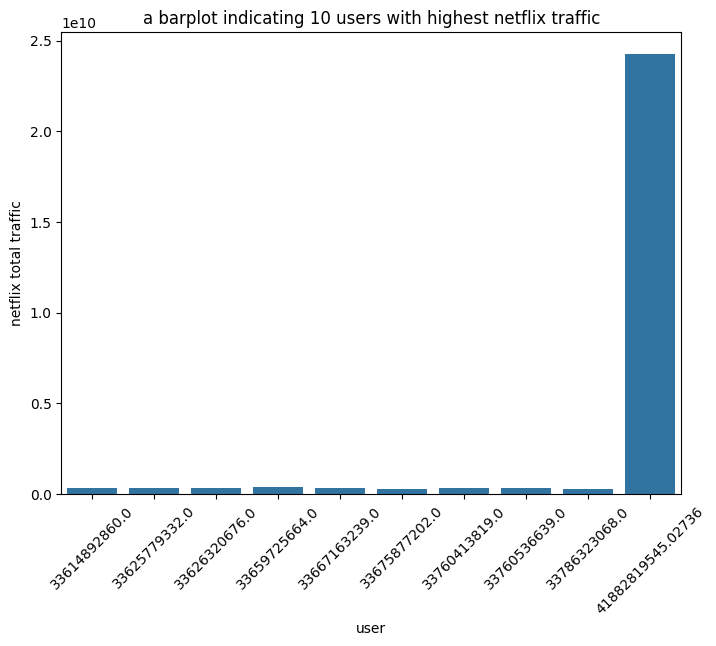

In [32]:
c = agg_apps_traffic.sort_values(by = 'netflix', ascending = False).head(10)
plt.figure(figsize = (8,6))
sns.barplot(x = c.index, y = c['netflix'])
plt.ylabel('netflix total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest netflix traffic')

10 users with highest gaming traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest gaming traffic')

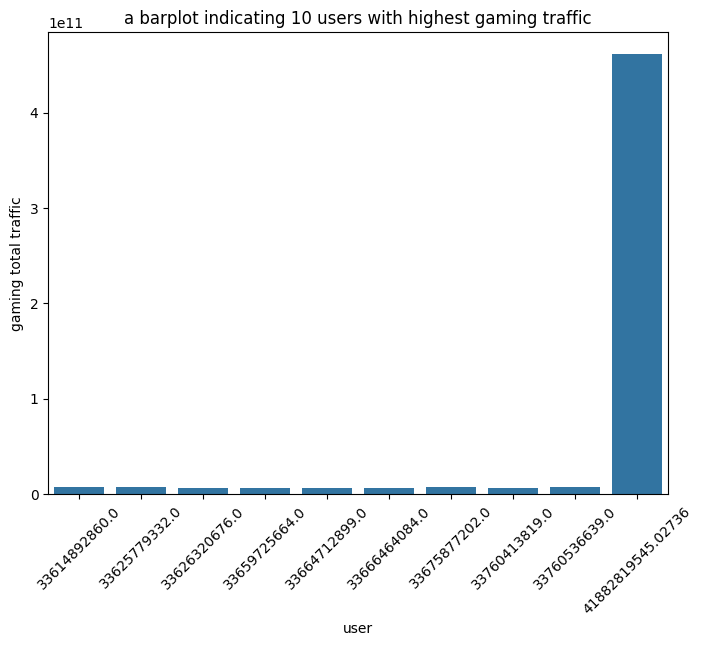

In [33]:
d = agg_apps_traffic.sort_values(by = 'gaming', ascending = False).head(10)
plt.figure(figsize = (8,6))
sns.barplot(x = d.index, y = d['gaming'])
plt.ylabel('gaming total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest gaming traffic')

10 users with highest google traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest google traffic')

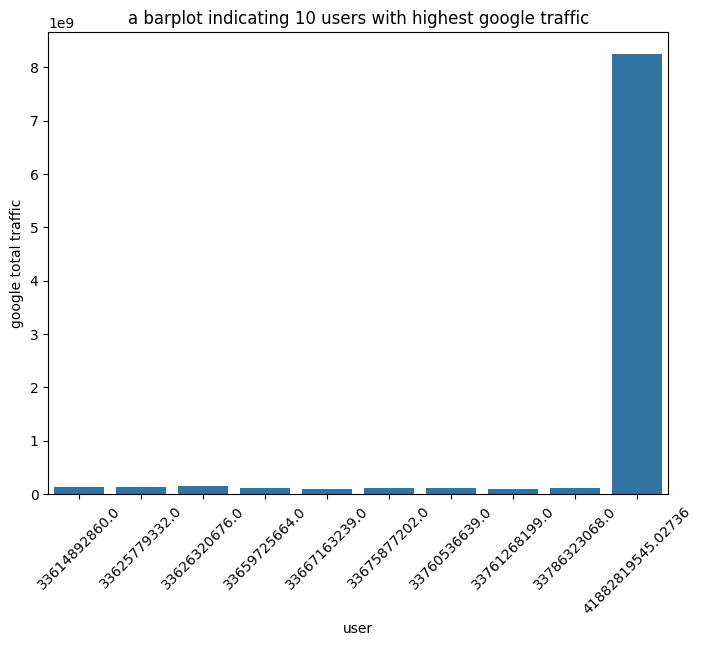

In [34]:
e = agg_apps_traffic.sort_values(by = 'google', ascending = False).head(10)
plt.figure(figsize = (8,6))
sns.barplot(x = e.index, y = e['google'])
plt.ylabel('google total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest google traffic')

10 users with highest email traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest email traffic')

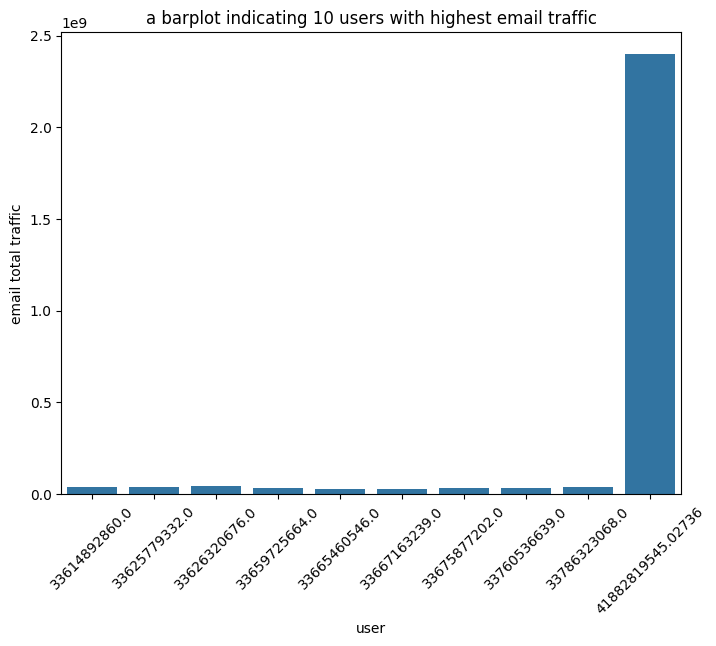

In [35]:
f = agg_apps_traffic.sort_values(by = 'email', ascending = False).head(10)
plt.figure(figsize = (8,6))
sns.barplot(x = f.index, y = f['email'])
plt.ylabel('email total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest email traffic')

10 users with highest youtube traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest youtube traffic')

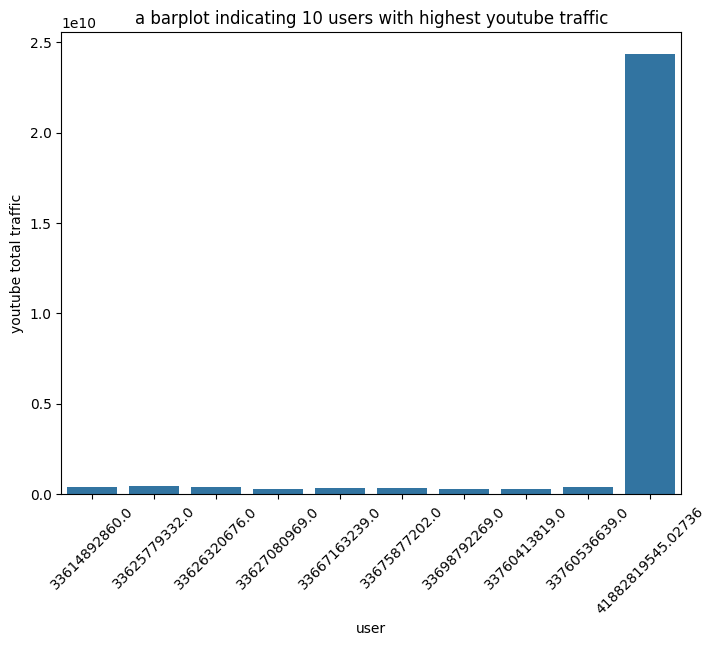

In [36]:
g = agg_apps_traffic.sort_values(by = 'youtube', ascending = False).head(10)
plt.figure(figsize = (8,6))
sns.barplot(x = g.index, y = g['youtube'])
plt.ylabel('youtube total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest youtube traffic')

10 users with highest other traffic

Text(0.5, 1.0, 'a barplot indicating 10 users with highest other traffic')

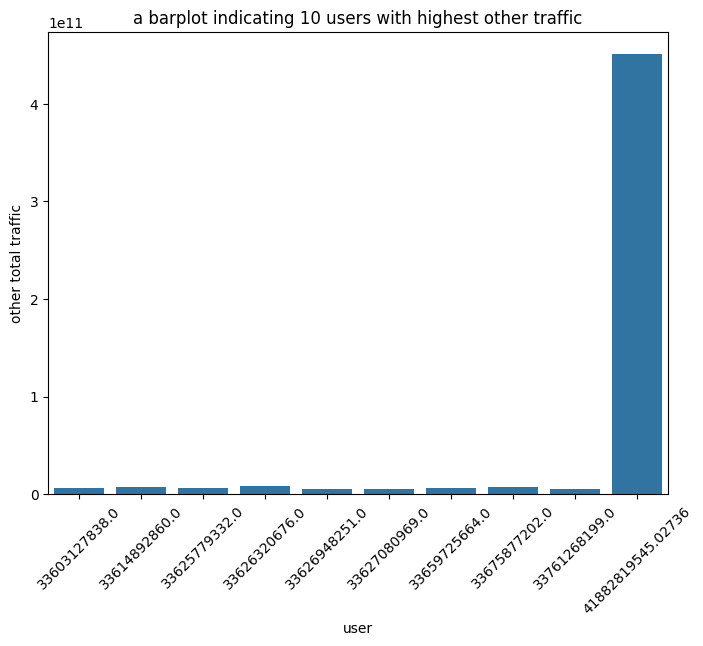

In [37]:
h = agg_apps_traffic.sort_values(by = 'other', ascending = False).head(10)
plt.figure(figsize = (8,6))
sns.barplot(x = h.index, y = h['other'])
plt.ylabel('other total traffic')
plt.xlabel('user')
plt.xticks(rotation = 45)
plt.title('a barplot indicating 10 users with highest other traffic')

In [38]:
# users in the 3 categories.
b = b.index.to_list()
c = c.index.to_list()
d = d.index.to_list()
e = e.index.to_list()
f = f.index.to_list()
g = g.index.to_list()
h = h.index.to_list()


def IntersecOfSets(arr1, arr2, arr3, arr4, arr5, arr6, arr7): 
    s1 = set(arr1) 
    s2 = set(arr2) 
    s3 = set(arr3) 
    s4 = set(arr4)
    s5 = set(arr5)
    s6 = set(arr6)
    s7 = set(arr7)

    set1 = s1.intersection(s2)
    set2 = set1.intersection(s3) 
    set3 = set2.intersection(s4)
    set4 = set3.intersection(s5) 
    set5 = set4.intersection(s6) 
    set6 = set5.intersection(s7) 
      
    final_list = list(set6) 
    print(final_list) 
  
IntersecOfSets(b, c, d, e, f, g, h) 

[41882819545.02736, 33614892860.0, 33625779332.0, 33626320676.0]


* Plot the top 3 most used applications.

Most used applications can be determined by the Application with highest traffic data or the application with the most users.

In [39]:
agg_apps_traffic.loc['total_app_traffic'] = agg_apps_traffic.sum()  
agg_apps_traffic.tail()

,social_media,netflix,youtube,gaming,google,email,other
MSISDN/Number,,,,,,,
41882819545.02736,1.973817e+09,2.425357e+10,2.434073e+10,4.614780e+11,8.248577e+09,2.399880e+09,4.509784e+11
3197020876596.0,7.152240e+05,2.659230e+07,1.195990e+07,1.780487e+08,1.043866e+07,1.520771e+06,4.705265e+08
337000037000919.0,5.215660e+05,3.090504e+07,3.673494e+07,5.101427e+08,9.830617e+06,3.318582e+06,1.491884e+08
882397108489451.0,1.546088e+06,2.884623e+07,4.094071e+07,4.307026e+07,9.218647e+06,3.330974e+06,4.013605e+08
total_app_traffic,2.742394e+11,3.394314e+12,3.396545e+12,6.455040e+13,1.171102e+12,3.388676e+11,6.440523e+13


Text(0.5, 0, 'application')

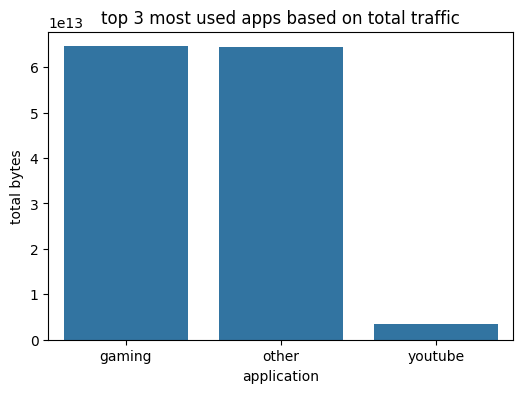

In [40]:
a = agg_apps_traffic.tail(1)
long_df = pd.melt(a)
long_df = long_df.sort_values(by = 'value', ascending = False).head(3)
plt.figure(figsize=(6,4))
sns.barplot(x = long_df.variable, y = long_df.value)
plt.title('top 3 most used apps based on total traffic')
plt.ylabel('total bytes')
plt.xlabel('application')

### * Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics:

In [41]:
# the user engagement metrics df (already normalized due to different units of measurement)
norm_agg_user_data = norm_agg_user_data.drop(['clusters'], axis = 1)
norm_agg_user_data.head()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes)
MSISDN/Number,,,
3.360100e+10,0.693147,18.575290,20.593943
3.360100e+10,0.693147,19.015283,18.870862
3.360100e+10,0.693147,18.720558,20.205695
3.360101e+10,0.693147,17.725091,19.861276
3.360101e+10,1.098612,17.429248,21.099927


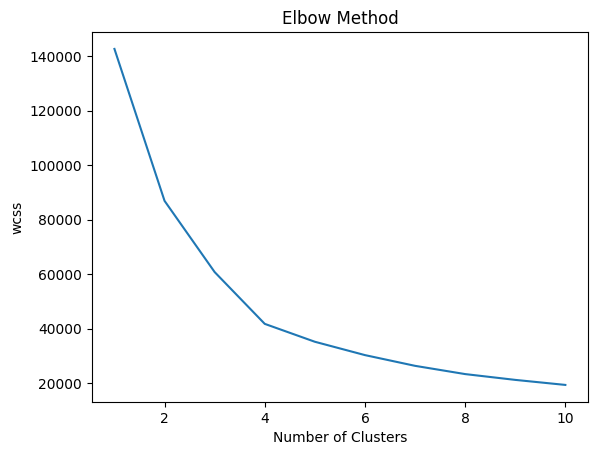

In [42]:
# determining number of clusters using elbow plot
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(norm_agg_user_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

k=4

In [43]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=0)
kmeans.fit(norm_agg_user_data)
y_means = kmeans.predict(norm_agg_user_data)
agg_user_data['clusters'] = y_means
# agg_user_data = agg_user_data.drop(['clusetrs'], axis = 1)
agg_user_data.head()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
MSISDN/Number,,,,
3.360100e+10,1,116720140.0,8.786906e+08,0
3.360100e+10,1,181230963.0,1.568596e+08,3
3.360100e+10,1,134969374.0,5.959665e+08,0
3.360101e+10,1,49878024.0,4.223207e+08,1
3.360101e+10,2,37104453.0,1.457411e+09,1


In [44]:
#clusters df1
cluster_1 = agg_user_data[agg_user_data.clusters == 0]
cluster_2 = agg_user_data[agg_user_data.clusters == 1]
cluster_3 = agg_user_data[agg_user_data.clusters == 2]
cluster_4 = agg_user_data[agg_user_data.clusters == 3]

In [45]:
# descriptions
cluster_1.describe()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
count,46138.000000,4.613800e+04,4.613800e+04,46138.0
mean,1.192770,1.174443e+08,6.867858e+08,0.0
std,0.402904,4.481643e+07,2.315831e+08,0.0
min,1.000000,4.160388e+07,3.463538e+08,0.0
25%,1.000000,8.639991e+07,5.120211e+08,0.0
50%,1.000000,1.020788e+08,6.640130e+08,0.0
75%,1.000000,1.481041e+08,8.152333e+08,0.0
max,4.000000,3.518824e+08,2.287800e+09,0.0


In [46]:
# descriptions
cluster_2.describe()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
count,19372.000000,1.937200e+04,1.937200e+04,19372.0
mean,1.071030,2.869734e+07,5.458530e+08,1.0
std,0.257885,1.144201e+07,2.611232e+08,0.0
min,1.000000,7.142988e+06,4.604748e+07,1.0
25%,1.000000,1.923894e+07,3.419606e+08,1.0
50%,1.000000,2.802951e+07,5.347992e+08,1.0
75%,1.000000,3.682105e+07,7.381824e+08,1.0
max,3.000000,5.910590e+07,1.789204e+09,1.0


In [47]:
# descriptions
cluster_3.describe()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
count,20313.000000,2.031300e+04,2.031300e+04,20313.0
mean,2.590459,3.502448e+08,1.363434e+09,2.0
std,7.549469,6.117278e+08,3.774483e+09,0.0
min,1.000000,8.307244e+07,1.770069e+08,2.0
25%,2.000000,2.091965e+08,9.112549e+08,2.0
50%,2.000000,2.725166e+08,1.212436e+09,2.0
75%,3.000000,3.730848e+08,1.599830e+09,2.0
max,1066.000000,7.255155e+10,5.317447e+11,2.0


In [48]:
# descriptions
cluster_4.describe()

,sessions_freq,sessions_duration(ms),sessions_traffic(bytes),clusters
count,21034.000000,2.103400e+04,2.103400e+04,21034.0
mean,1.026956,1.237225e+08,2.095928e+08,3.0
std,0.162546,6.736007e+07,8.204483e+07,0.0
min,1.000000,1.886284e+07,3.324901e+07,3.0
25%,1.000000,8.639989e+07,1.380796e+08,3.0
50%,1.000000,1.009836e+08,2.093212e+08,3.0
75%,1.000000,1.534621e+08,2.814172e+08,3.0
max,3.000000,1.042254e+09,3.538151e+08,3.0
